<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b><center><font size="6">Cours - Econométrie en finance - Séance 3</font></center></b>
    
<g><h7><center> CM - P. Durand  - pierre.durand@u-pec.fr </center></h7></g>

<g><h7><center> TD - A. Birem  - abderraouf.birem@etu.u-pec.fr </center></h7></g>


<b><center><font size="5">M1 - 2024-2025</font></center></b> 



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">




<br>
<b>Plan du cours : </b>

- Séance 1 – Introduction générale & Introduction avancée à Python
- Séance 2 – Rappels économétriques et bases de données sous python
- <b>Séance 3 – Modèle de régression simple</b>
- Séance 4 - Modèle de régression multiple
- Séance 5 – Violation des hypothèses (1)
- Séance 6 – Violation des hypothèses (2)
- Séance 7 – Caractéristiques des séries temporelles
- Séance 8 – Stationnarité et conséquences, tests de racine unitaire
- Séance 9 – Modélisation en série temporelles : ARMA-ARCH
- Séance 10 - Modèles VAR et correction d'erreur
- Séance 11 – Introduction aux modèles de classification : logit



<b>Références en Econométrie</b> :

- Pesaran, M. H. (2015). Time series and panel data econometrics. Oxford University Press.

- Bourbonnais, R. (2008), Econométrie, Dunod, 7e édition.

- Mignon, V. (2008), Econométrie : Théorie et applications.

- Lardic, S. & Mignon, V. (2002), Econométrie des séries temporelles macroéconomiques et financières.


<b>Références pour la finance</b>  :

-	Finance de marché (Portait – Poncet)
-	Recent advances in linear models and related areas (Shalabh – Heumann)

<b>Références pour python</b>  :

- Presque tout est gratuit et en open source sur internet
- Liste non exhaustive de livres : <a href="https://python.developpez.com/livres/"> python.developper</a>



<br>
<hr style=" border: .5px solid black;">

<a id='plan'></a>
<br>
<b>Séance 3 : </b>


- [1. Intuition graphique](#p1)
- [2. Vocabulaire](#p2)
- [3. Modèle de régression simple et propriété du terme d'erreur](#p3)
    - [3.1 Modèle de régression simple](#p3.1)
    - [3.2 Propriétés du terme d'érreur](#p3.2)
- [4. Les Moindres Carrés Ordinaires](#p4)
    - [4.1 Principe des MCO](#p4.1)
    - [4.2 Estimateurs MCO](#p4.2)
    - [4.3 Propriétés des estimateurs](#p4.3)
- [5. Application : la relation entre le prix du pétrole et le DJI](#p5)
    - [5.1 Exposition du problème](#p5.1)
    - [5.2 Collecte des données](#p5.2)    
    - [5.3 Statistiques descriptives](#p5.3)
    - [5.4 Estimation du modèle et interpétation](#p5.4)    
    



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">




# Intuition graphique <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1'></a>


Qu'est ce qu'une analyse de régression ? C'est l'étude de la dépendance entre une variable (la <b>variable expliquée</b> ou <b>endogène</b>) et une ou plusieurs autres variables (<b>variables explicatives</b> ou <b>exogène</b>). Lorsqu'il n'y a qu'une seule variable explicative, on parle de <b>régression simple</b> et sinon de <b>régression multiple</b>. 


Les Moindres Carrés Ordinaires (MCO) consistent en une estimation de cette relation de dépendance. Voici comment, graphiquement, les MCO fonctionnent dans un cas bivarié (i.e. une régression simple) :

</span>

In [2]:
# importation des packages utiles

# pour le traitement des données
import pandas as pd 
import numpy as np

# pour les graphiques
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from matplotlib.ticker import MaxNLocator 

# pour l'estimation du modèle
import statsmodels.api as sm


In [3]:
# importer les données
df = pd.read_csv("data/fred_okun.csv", sep="\t")

In [5]:
# redéfinition des colonnes
df.columns = ["dates", "gdp_gap", "un_gap", "gdp_pot", "un_nat", "gdp_real", "un", "investment"] # on renomme les variables
df["dates"] = pd.to_datetime(df["dates"], infer_datetime_format = True)  

# ajout de variables transformées
df["gdp_growth"] =  ((df["gdp_real"] / df["gdp_real"].shift(1)) - 1)*100
df["un_change"] = (df["un"] - df["un"].shift(1))

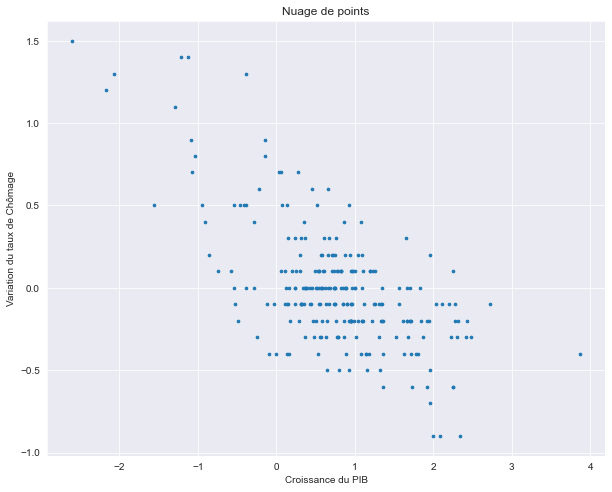

In [6]:
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")

plt.scatter(df["gdp_growth"], df["un_change"],s=7)



plt.title("Nuage de points")
plt.xlabel("Croissance du PIB")
plt.ylabel("Variation du taux de Chômage")

plt.show()

$$
y=a+bx
$$
$$
y=2-\underbrace{0,5}_{\text{valeurs}}x
$$
L'équation nous permet de prédire et de faire de la prévision

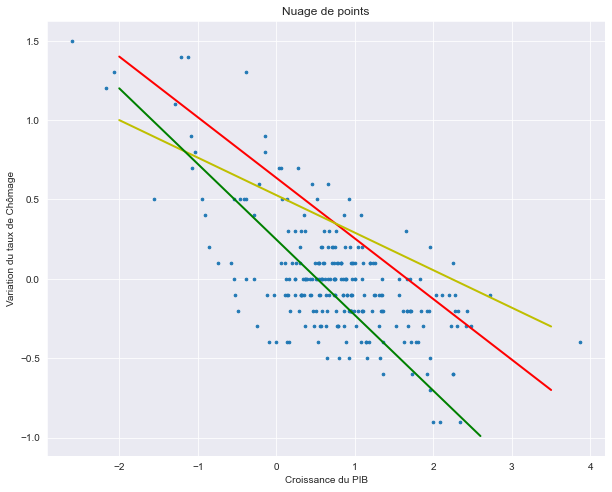

In [4]:
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")

plt.scatter(df["gdp_growth"], df["un_change"],s=7)

plt.plot([-2, 3.5], [1.4, -0.7], 'r-', lw=2)
plt.plot([-2, 3.5], [1, -0.3], 'y-', lw=2)
plt.plot([-2, 2.6], [1.2, -0.99], 'g-', lw=2)

plt.title("Nuage de points")
plt.xlabel("Croissance du PIB")
plt.ylabel("Variation du taux de Chômage")

plt.show()

Quel est la meilleure droite ?

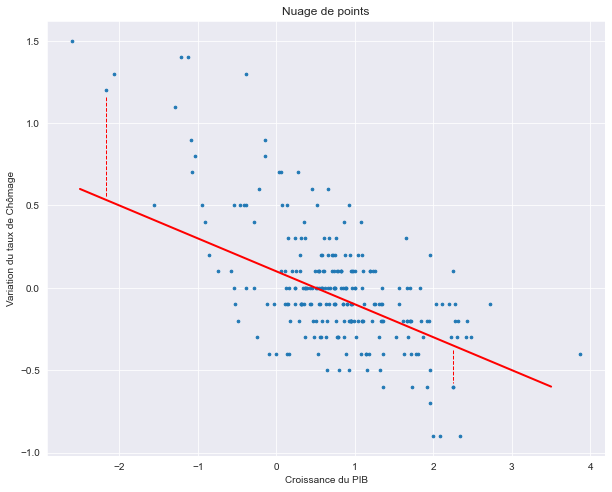

In [5]:
plt.figure(figsize=(10, 8))

plt.scatter(df["gdp_growth"], df["un_change"],s=7)

plt.plot([-2.5, 3.5], [0.6, -0.6], 'r-', lw=2)

plt.plot([-2.17, -2.17], [1.16, 0.55], 'r--', lw=1)
plt.plot([2.25,2.25], [-0.38, -0.58], 'r--', lw=1)

plt.title("Nuage de points")
plt.xlabel("Croissance du PIB")
plt.ylabel("Variation du taux de Chômage")

plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

L'idée est donc de s'intéresser à la somme des écarts entre la droite et les points, c a d entre <b>l'estimation</b> et les <b>observations</b>. On trouvera donc la <b>meilleure</b> estimation en trouvant la droite pour laquelle cette somme est la plus petite, <b>minimale</b>. 

<br>

<hr style=" border: 2.5px solid black;">



# Un peu de vocabulaire <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2'></a>

<b>La linéarité</b>

Une fonction peut être linéarire dans ses paramètres et dans ses variables : 
- Linéarité dans les variables : $Y = \alpha + \beta X$, ou encore $log(Y) = \alpha + \beta log(X)$. Contre exemples :
    - $\frac{1}{Y} = \alpha + \beta log(X)$
    - $exp(Y) = \alpha + \beta \frac{1}{X}$
    - $Y = exp(\alpha + \beta X)$
- Linéarité dans les paramètres  : lorsque les paramètres sont à la même puissance, donc $Y = \alpha + \beta X$, ou même $\frac{1}{Y} = \alpha + \beta log(X)$. 
    
Contre exemples :

- $Y = \alpha^2 + \beta X$ 
    
- $Y = \alpha + \frac{\alpha}{\beta} X$
    
    
$\Rightarrow$ Nous nous intéressons aux modèles linéaires dans les paramètres.






</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


# Modèle de régression simple et propriété du terme d'erreur <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p3'></a>


## Modèle de régression simple <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p3.1'></a>


Comme rappelé un peu plus haut, le modèle de régression simple est donné par l'équation : 

$$Y = \alpha + \beta X + \epsilon $$

où :

- $Y$ est la variable expliquée (observée)
- $X$ est la variable explicative (observée)
- $\alpha$ (la constante) et $\beta$ (le coefficient de pente) sont les paramètres à estimer (inconnus) $(\alpha \, , \beta \in \mathbb{R})$
- $\epsilon$ est le terme d'erreur (inconnu)
    
La spécification c'est la manière dont on a défini le modèle : choix des variable et forme fonctionnel.






</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


## Propriétés du terme d'erreur <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p3.2'></a>


On ne peut pas mesurer ou prévoir le terme d'erreur $\epsilon$ pour chaque observation. 

$\Rightarrow$ On émet un certain nombre d'hypothèses sur ce terme....
 
<br>

<b> Nulité de l'erreur moyenne </b>

$$
\mathbb{E}(\epsilon_t)=0
$$
Avec 
    $$
    \epsilon \in \mathbb{R}
    $$
Cette hypothèse signifie qu'en moyenne le modèle est bien spécifié. 
</span>

In [7]:
# maths
import numpy as np
from numpy.linalg import solve
import random as rd

# estimation
from sklearn.linear_model import LinearRegression

# pour les 
import seaborn as sns

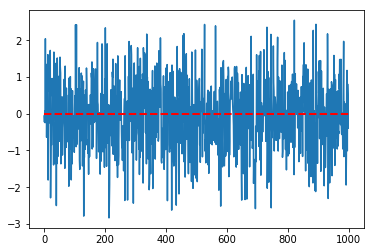

In [3]:
X = np.random.randn(1000, 1)

plt.plot(X)

plt.plot([0,1000], [0, 0], 'r--', lw=2)

plt.show()

In [120]:
sum(X)/1000

array([-0.03299104])

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<br>

<b> L'absence d'autocorrélation des erreurs</b>

La valeur de l'erreur en $t$ (période ou individu) ne déprend pas en $t'$

Il n'y pas de corrélation entre deux erreurs à deux dates différentes ou entre deux individus
    
$$
$$
</span>

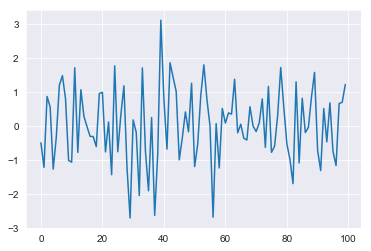

In [121]:
# Série non autocorrélée
X = np.random.randn(100, 1)

plt.plot(X)

plt.show()

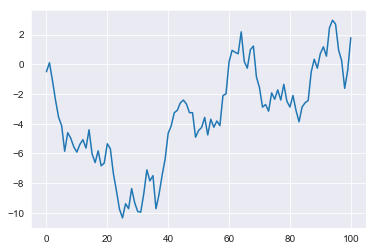

In [123]:
# série autocorrélée
Y = [  X[0]    ]

for i in range(100) :
    Y.append(Y[i]+ np.random.normal(0,1)) 
    
plt.plot(Y)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

$$Y_t = Y_{t-1} + \epsilon$$

Ce que l'on appelle également, une marche aléatoire.

<br>

<b> Homoscédasticité des erreurs</b>

La variance de l'erreur est constante (au cours du temps ou entre les individus)
    
$$
\mathbb{E}(\epsilon^2_t)=\sigma_{\epsilon}
$$

</span>

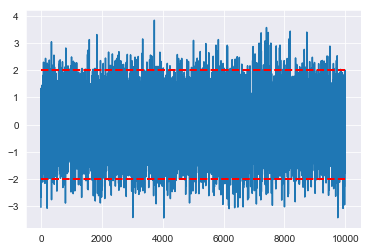

In [124]:
X = np.random.normal(0, 1,size=(1,10000))

plt.plot(X[0])

plt.plot([0,10000], [2, 2], 'r--', lw=2)
plt.plot([0,10000], [-2, -2], 'r--', lw=2)

plt.show()

In [6]:
# pour scrapper
import requests as rq
from bs4 import BeautifulSoup as bs
import json
import datetime as dt
from io import StringIO

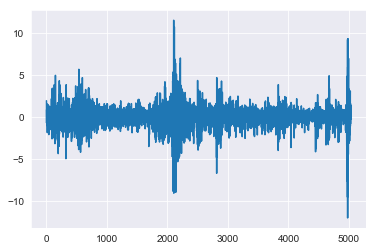

In [126]:
# Données pour le SP 500 : hétéroscédastique
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "^GSPC"
period1 = int(dt.datetime(2000,6,1).timestamp())
period2 = int(dt.datetime(2020,6,1).timestamp())
interval = "1d"

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)

full_url = url_base + url_suite

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)

data_sp = pd.read_csv(str_io, sep=",")

data_sp["gr_close"] = (data_sp["Adj Close"] / data_sp["Adj Close"].shift(1) -1 )*100

plt.plot(data_sp["gr_close"])
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b> Remarque </b> : on rassemble généralement les hypothèses de non autocorrélation et d'homoscédasticité des erreurs sous une seule hypothèse : 
- les erreurs sont dîtes <b>sphériques</b>, ou on les qualifie de <b>bruit blanc</b>
- on le note :
    
    $$
E(\epsilon_t \epsilon_{t'}) = \left\{
    \begin{array}{ll}
        0 & \forall t \neq t'\\
        \sigma^2_{\epsilon}& \forall t = t'
    \end{array}
\right.
$$

$$ \epsilon \sim BB(0,\sigma^2_{\epsilon}) $$



<br>

<b> Normalité des erreurs</b>

On suppose que le terme d'erreur suit une loi normale centrée et de variance constante
    
Cette hypothèse se vérifie d'autant plus que le nombre d'observation est grand

$$
\epsilon_t \tilde N(0,\sigma^2
$$
</span>

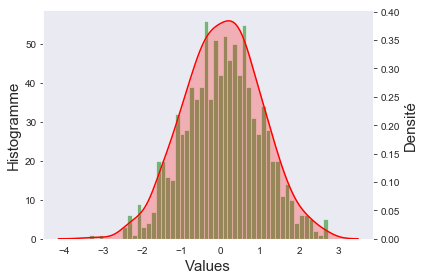

In [83]:
X = np.random.normal(0, 1,1000)

#Avec deux échelles : changer le style des graphiques (sinon, supperposition de deux grilles)
sns.set_style("dark")

fig, ax1 = plt.subplots()

ax1.set_xlabel('Values', fontsize=15)

ax1.set_ylabel('Histogramme', fontsize=15)
plt.hist(X, 50, facecolor='g', alpha=0.50) 


ax2 = ax1.twinx()  # Pour faire partager le même axe des abscisses aux deux graphiques

ax2.set_ylabel('Densité', fontsize=15)  
sns.kdeplot(X, shade=True, color="r")


fig.tight_layout()  # Ajustement des axes
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


# Les Moindres Carrés Ordinaires<font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p4'></a>


## Principe des MCO<font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p4.1'></a>

$$Y_t = \alpha + \beta X_t + \epsilon_t $$
    
$$\widehat{Y_t} = \widehat{\alpha} + \widehat{\beta} X_t $$

$$ e_t = Y_t-\widehat{Y_t}=Y_t-\widehat{\alpha}-\widehat{\beta} X_t$$  
    
$$ MCO \Leftrightarrow \min \sum_{t=1}^{T} e^2_t $$
    
</span>

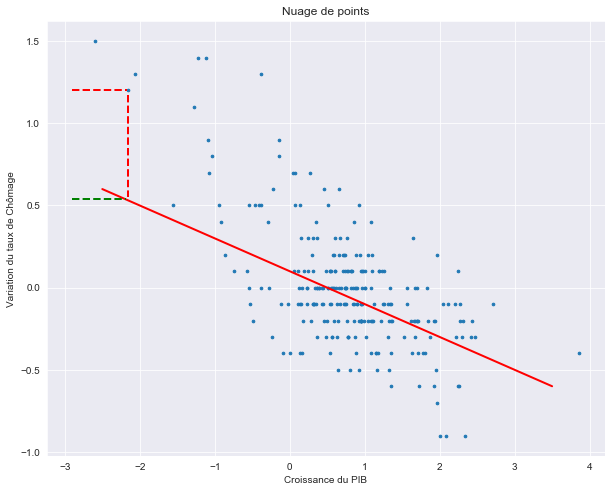

In [106]:
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")

plt.scatter(df["gdp_growth"], df["un_change"],s=7)

plt.plot([-2.5, 3.5], [0.6, -0.6], 'r-', lw=2)

plt.plot([-2.16, -2.16], [1.17, 0.55], 'r--', lw=2)
plt.plot([-2.9, -2.17], [1.2, 1.2], 'r--', lw=2)
plt.plot([-2.9, -2.19], [0.54, 0.54], 'g--', lw=2)



plt.title("Nuage de points")
plt.xlabel("Croissance du PIB")
plt.ylabel("Variation du taux de Chômage")

plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>






$$ MCO \Longleftrightarrow Min \sum_{t=1}^T e_t^2$$







</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

    
    
## Estimateurs MCO<font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p4.2'></a>

<b>Résultat :</b> les estimateurs MCO donnent,

$$\hat{\alpha} = \bar{Y} - \hat{\beta} \bar{X} $$

et

$$ \hat{\beta} = \frac{Cov(X_t,Y_t)}{V(X_t)} \\
 = \frac{\sum_{t=1}^T(X_t - \bar{X})(Y_t - \bar{Y})}{\sum_{t=1}^T(X_t - \bar{X})^2}$$



<br>

<b>Preuve</b> :

1. Conditions de premier ordre (CPO) : les dérivés premières sont égales à $0$ (extremum global)

<br>

- On commence par la constante :

$\frac{\delta SCR}{\delta \hat{\alpha}} = \frac{\delta\sum (Y_t - \hat{\alpha} - \hat{\beta} X_t)^2}{\delta \hat{\alpha}} = 0$

donc, en se rappelant que la dérivée d'une somme est égale à la somme des dérivée, on a :

$-2 \sum (Y_t - \hat{\alpha} - \hat{\beta} X_t) = 0 $

puis, 

$-2 ( \sum_t^T Y_t - T\hat{\alpha} - \hat{\beta} \sum_t^T X_t ) = 0$

d'où,

$-2(T \bar{Y} - T\hat{\alpha} - \hat{\beta} T \bar{X} ) = 0$

et enfin, en factorisant par $-2T$ et en passant de l'autre côté :

$\bar{Y} - \hat{\alpha} - \hat{\beta} \bar{X} = 0$

$\Longleftrightarrow \hat{\alpha} = \bar{Y} - \hat{\beta} \bar{X}$

<br>



- Nous procédons de la même manière pour la deuxième CPO (sur $\beta$) :

$\frac{\delta SCR}{\delta \hat{\beta}} = \frac{\delta\sum (Y_t - \hat{\alpha} - \hat{\beta} X_t)^2}{Y_t - \hat{\beta} - \hat{\beta} X_t} = 0$

ce qui donne,

$-2 \sum X_t(Y_t - \hat{\alpha} - \hat{\beta} X_t) = 0 $

puis, en remplaçant $\hat{\alpha}$ par son expression :

$-2 \sum X_t(Y_t - (\bar{Y} - \hat{\beta} \bar{X}) - \hat{\beta} X_t) = 0 $

et en regroupant les termes,

$\sum (Y_t - \bar{Y})X_t = \hat{\beta}\sum (X_t - \bar{X})X_t$

d'où (en appliquant quelques équivalences sur les sommes et les moyennes),

$\hat{\beta} = \frac{\sum (Y_t - \bar{Y})(X_t-\bar{X})}{\sum(X_t - \bar{X})^2}$

et enfin, 

$ \hat{\beta} = \frac{Cov(X_t,Y_t)}{V(X_t)} $


<br>

2. Conditions de second ordre (CSO) : les dérivés secondes doivent être positives (minimum global) :


<br>

- Pour $\hat{\alpha}$ :

$\frac{\delta SCR}{\delta \hat{\alpha}} = -2 \sum (Y_t - \hat{\alpha} - \hat{\beta} X_t)$

d'où,

$\frac{\delta^2 SCR}{\delta^2 \hat{\alpha}} = 2 > 0$

<br>

- Pour $\hat{\beta}$ :


$\frac{\delta SCR}{\delta \hat{\beta}} = -2 \sum X_t(Y_t - (\bar{Y} - \hat{\beta} \bar{X}) - \hat{\beta} X_t)$

et en regroupant puis en redérivant,

$\frac{\delta^2 SCR}{\delta^2 \hat{\beta}} = 2 \sum(X_t - \bar{X})^2 >0$


<br>

<b>Conclusion</b> : les CPO et CSO sont bien vérifiées, d'où le couple $(\hat{\alpha},\hat{\beta})$ correspond bien au minimum de la SCR.

</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;"> 
    
    
## Propriétés des estimateurs <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p4.3'></a>

1) La droite de regression passe par le point moyen $(\bar X , \bar Y)$

$$
\mathbb{E}(\widehat\alpha)=\alpha
$$
$$
\mathbb{E}(\widehat\beta)=\beta
$$
parmis tous les estimateur sans biais celui obtenu par les MCO est ce lui qui a la variance minimal pour $\widehat\beta$. La valeur de $\widehat\beta$ ne va pas beaucoup bouger selon les échantillons. Les estimateurs des MCO sont BLUE
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">

    
    
# Application : la relation entre le prix du pétrole et le DJI <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p5'></a>


## Exposition du problème <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p5.1'></a>

On s'intéresse ici à l'influence que pourrait potentiellement avoir le prix du pétrole sur les marchés boursiers américains. 

Un sujet déjà étudié par de nombreux auteurs : <a href="https://scholar.google.fr/scholar?q=oil+price+impact+on+stock+market&hl=fr&as_sdt=0&as_vis=1&oi=scholart">Google Scholar.</a> 

Un exemple : <a href="https://www.dallasfed.org/~/media/documents/institute/wpapers/2015/0249.pdf">un article de recherche.</a>

La logique dernière l'étude de cette relation : 
- le pétrole est un matière première fondamentale dans la production, en plus de servir au transport (ex : agriculture)
- le prix du pétrole est historiquement très lié à l'activité économique et financière (c'est donc un indicateur de référence)
- le prix du pétrole peut aussi avoir un fort impact sur le marché des changes (cf US et pays spécialisés) 
- etc... 

On pourrait donc s'intéresser à la relation : 

$$ DJI_t = \alpha + \beta Oil_t + \epsilon_t$$

- Nous verrons comment, même dans une relation aussi simpliste que celle-ci, il peut être pertinent d'introduire un retard dans la variable explicative. 
- Nous verrons également que cela peut nous permettre d'éviter en partie le problème d'endogénéité :
    - le prix du pétrole est probablement influencé par la variable que l'on cherche à expliquer (cours du arché boursier)
    - le modèle VAR utilisé par l'auteur cité plus haut, est aussi un manière de pallier ce problème


<br>

<hr style=" border: .5px solid black;">


## Collecte des données <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p5.2'></a>

De nombreuses séries financières peuvent être téléchargées depuis <a href="https://fr.finance.yahoo.com/">Yahoo Finance</a>.

Pour un gain de temps, nous utilisons ici des commandes de _web scraping_.

</span>

In [8]:
# Données pour le crude oil
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "CL=F"
period1 = int(dt.datetime(2001,6,1).timestamp())
period2 = int(dt.datetime(2021,6,1).timestamp())
interval = "1d"

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)

full_url = url_base + url_suite

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)


# création dataframe
data_oil = pd.read_csv(str_io, sep=",")

# calcul de la série des rendements
data_oil["gr_close"] = (data_oil["Adj Close"] / data_oil["Adj Close"].shift(1) -1 )*100

In [9]:
# Données pour le DJI
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "^DJI"
period1 = int(dt.datetime(2001,6,1).timestamp())
period2 = int(dt.datetime(2021,6,1).timestamp())
interval = "1d"

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)

full_url = url_base + url_suite

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)


# création dataframe
data_dj = pd.read_csv(str_io, sep=",")

# calcul de la série des rendements
data_dj["gr_close"] = (data_dj["Adj Close"] / data_dj["Adj Close"].shift(1) -1 )*100

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">


    

## Statistiques descriptives <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p5.3'></a>

Nous pouvons passé à une analyse graphique et des statistiques descriptives des données récoltées. 

</span>

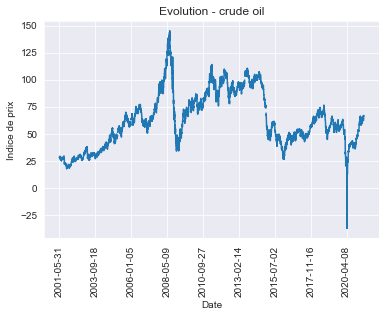

In [186]:
ax = plt.figure().gca()

plt.plot(data_oil["Date"],data_oil["Adj Close"])

plt.title("Evolution - crude oil")
plt.xlabel("Date")
plt.ylabel("Indice de prix")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks( rotation='vertical')

plt.show()

On dira une marche aléatoire

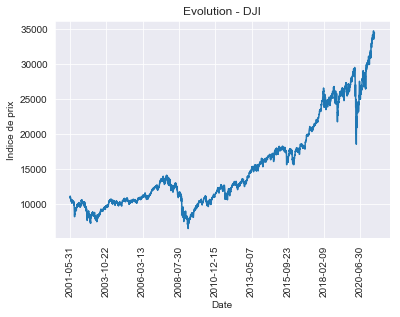

In [148]:
ax = plt.figure().gca()

plt.plot(data_dj["Date"],data_dj["Adj Close"])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks( rotation='vertical')

plt.title("Evolution - DJI")
plt.xlabel("Date")
plt.ylabel("Indice de prix")

plt.show()

In [10]:
# fusion des variables sous un même dataframe

data_oil["oil"] = data_oil["Adj Close"]
data_dj["dji"] = data_dj["Adj Close"]

df = pd.merge(data_dj[["Date","dji"]],data_oil[["Date","oil"]],on="Date")

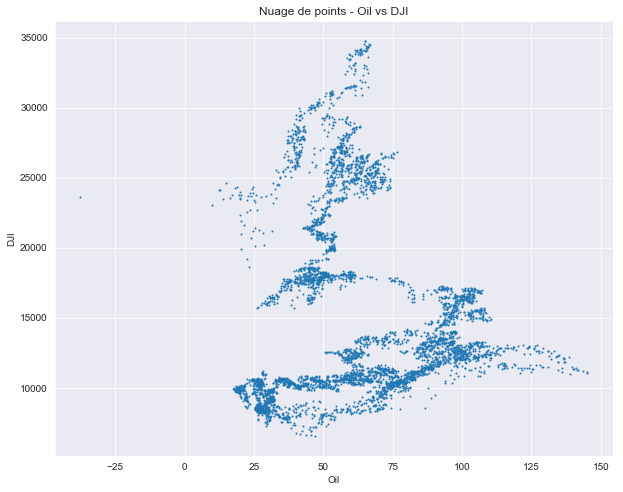

In [179]:
# nuage de points 
plt.figure(figsize=(10, 8))
plt.scatter(df["oil"],df["dji"],s=1)

plt.title("Nuage de points - Oil vs DJI")
plt.xlabel("Oil")
plt.ylabel("DJI")

plt.show()

dispersion des points qui ne permet pas d'afffirmer l'existence ou nons d'une relation linéaire entre nos deux variable 

In [180]:
# corrélations linéaires

df[["oil","dji"]].corr()

,oil,dji
oil,1.000000,-0.042498
dji,-0.042498,1.000000


In [11]:
df

,Date,dji,oil
0,2001-05-31,10911.940430,28.370001
1,2001-06-01,10990.410156,27.930000
2,2001-06-04,11061.519531,28.129999
3,2001-06-05,11175.839844,28.240000
4,2001-06-06,11070.240234,27.719999
...,...,...,...
5024,2021-05-24,34393.980469,66.050003
5025,2021-05-25,34312.460938,66.070000
5026,2021-05-26,34323.050781,66.209999
5027,2021-05-27,34464.640625,66.849998


In [12]:
# calcul des séries de rendements

df["oil_gr"] = (df["oil"]/df["oil"].shift(1) - 1) * 100
df["dji_gr"] = (df["dji"]/df["dji"].shift(1) - 1) * 100

In [13]:
df

,Date,dji,oil,oil_gr,dji_gr
0,2001-05-31,10911.940430,28.370001,NaN,NaN
1,2001-06-01,10990.410156,27.930000,-1.550938,0.719118
2,2001-06-04,11061.519531,28.129999,0.716072,0.647013
3,2001-06-05,11175.839844,28.240000,0.391045,1.033496
4,2001-06-06,11070.240234,27.719999,-1.841363,-0.944892
...,...,...,...,...,...
5024,2021-05-24,34393.980469,66.050003,3.884871,0.544146
5025,2021-05-25,34312.460938,66.070000,0.030276,-0.237017
5026,2021-05-26,34323.050781,66.209999,0.211895,0.030863
5027,2021-05-27,34464.640625,66.849998,0.966620,0.412521


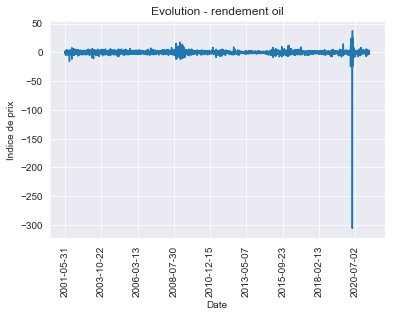

In [183]:
# Evolution des rendements
ax = plt.figure().gca()

plt.plot(df["Date"],df["oil_gr"])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks( rotation='vertical')

plt.title("Evolution - rendement oil")
plt.xlabel("Date")
plt.ylabel("Indice de prix")

plt.show()

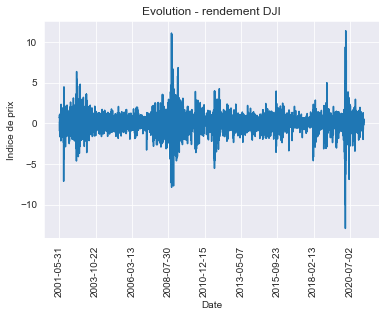

In [185]:
# Evolution des rendements
ax = plt.figure().gca()

plt.plot(df["Date"],df["dji_gr"])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks( rotation='vertical')

plt.title("Evolution - rendement DJI")
plt.xlabel("Date")
plt.ylabel("Indice de prix")

plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">
    

## Estimation du modèle et interpétation <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p5.4'></a>

La relation entre les deux variables apparait plus complexe que ce que permettent de rendre compte les MCOs. Cela étant, cela vaut le coup de regarder ce que donnent les résultats :

</span>

In [188]:
# Régression MCO - sur les séries en niveau

# on défini les variables du modèle
y = df.dropna()["dji"].iloc[1:] 
X = df.dropna()["oil"].iloc[1:]

# on ajoute la constante
X = sm.add_constant(X)

# on estime le modèle
results = sm.OLS(y, X).fit()

# on affiche les résultats
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    dji   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.296
Date:                Thu, 23 Sep 2021   Prob (F-statistic):            0.00231
Time:                        02:39:35   Log-Likelihood:                -50284.
No. Observations:                4943   AIC:                         1.006e+05
Df Residuals:                    4941   BIC:                         1.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.598e+04    241.222     66.252      0.0

In [196]:
# on récupère les résidus pour voir ce que ça donne
residus = results.resid

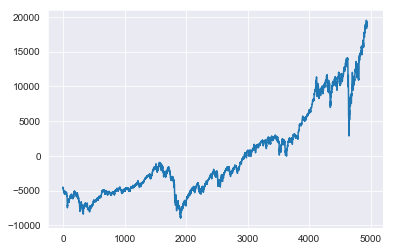

In [198]:
# graphiquement : on peut supposer un problème d'échelle
plt.plot(residus)
plt.show()

In [199]:
# Régression MCO - on essaye avec les séries des rendements

# on défini les variables du modèle
y = df.dropna()["dji_gr"].iloc[1:] 
X = df.dropna()["oil_gr"].iloc[1:]

# on ajoute la constante
X = sm.add_constant(X)

# on estime le modèle
results = sm.OLS(y, X).fit()

# on affiche les résultats
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 dji_gr   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     96.90
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.18e-22
Time:                        02:44:20   Log-Likelihood:                -7813.3
No. Observations:                4943   AIC:                         1.563e+04
Df Residuals:                    4941   BIC:                         1.564e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0290      0.017      1.734      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


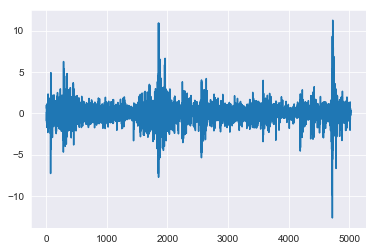

In [200]:
# on récupère les résidus pour voir ce que ça donne
residus = results.resid

plt.plot(residus)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

- La série des résidus est plus proche de ce que l'on attend
- Il reste néanmoins des limtes à cette régression
- Nous verrons ces différentes limites dans les prochains chapitres ainsi que dans le cours sur les séries emporelles. 
- Une autre solution (interpédiair) : passer par le log.


$\Rightarrow$ Les principaux problèmes ici sont l'endogénéité, la linéarité du modèle et la structure contemporaine de la spécification. 


</span>